<a href="https://colab.research.google.com/github/Miksan31/Agentic-AI/blob/main/CrewAI_ML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas scikit-learn crewai crewai_tools --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 2.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.0/235.0 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.9/542.9 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.0/134.0 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.4/211.4 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 628.3/628.3 kB 8.5 MB/s eta 0

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from crewai import Agent, Crew, Task, Process

In [ ]:
from google.colab import files

# Upload the dataset
uploaded = files.upload()

# Get the filename of the uploaded file
dataset_file = list(uploaded.keys())[0]
print(f"Uploaded dataset: {dataset_file}")


Saving Salary_dataset.csv to Salary_dataset.csv
Uploaded dataset: Salary_dataset.csv


In [ ]:
from crewai.agent import Agent

# Define the preprocessing agent
preprocess_agent = Agent(
    role="Data Preprocessor",
    goal="Prepare the data for machine learning by cleaning and splitting it into train and test sets.",
    backstory="I clean, organize, and split data to make it ready for training and evaluation.",
    verbose=True,
)

# Define the training agent
train_agent = Agent(
    role="Model Trainer",
    goal="Train a machine learning model (Linear Regression) using the training dataset.",
    backstory="I build predictive models based on data to solve problems.",
    verbose=True,
)


# Define the evaluation agent
eval_agent = Agent(
    role="Model Evaluator",
    goal="Evaluate the trained model using the test dataset.",
    backstory="I measure and analyze how well the model performs.",
    verbose=True,
)


In [ ]:
# Define Task for Preprocessing
preprocess_task = Task(
    description="Clean and preprocess the dataset. Remove missing values, split the dataset into features (X) and target (y), and then split into training and testing sets.",
    expected_output="Preprocessed data including X_train, X_test, y_train, and y_test ready for training.",
    agent=preprocess_agent,
)

# Define Task for Training
train_task = Task(
    description="Train a Linear Regression model using the preprocessed training dataset.",
    expected_output="A trained Linear Regression model ready for evaluation.",
    agent=train_agent,
)

# Define Task for Evaluation
eval_task = Task(
    description="Evaluate the trained model on the test dataset and calculate performance metrics (Mean Squared Error, R-squared).",
    expected_output="Model evaluation metrics including Mean Squared Error (MSE) and R-squared value.",
    agent=eval_agent,
)

In [ ]:
from crewai import Crew, Task, Agent
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Define the Agents
preprocess_agent = Agent(
    role="Data Preprocessor",
    goal="Prepare the dataset by cleaning, organizing, and splitting into train/test sets.",
    backstory="I prepare raw data to ensure it's ready for analysis.",
    verbose=True,
)

train_agent = Agent(
    role="Model Trainer",
    goal="Train a regression model on the provided dataset.",
    backstory="I build predictive models from data for actionable insights.",
    verbose=True,
)

eval_agent = Agent(
    role="Model Evaluator",
    goal="Evaluate the trained regression model.",
    backstory="I measure model performance using key metrics.",
    verbose=True,
)

# Define Task for Preprocessing
preprocess_task = Task(
    description="""\
    # Data Preprocessing Task

    1. Load the dataset from the provided file.
    2. Clean the data by removing any rows with missing values.
    3. Split the dataset into features (X) and target (y).
    4. Split the data into training and testing sets (80% for training, 20% for testing).

    ```python
    # Load dataset
    df = pd.read_csv(dataset_file)

    # Clean data by dropping rows with missing values
    df = df.dropna()

    # Split dataset into features (X) and target (y)
    X = df.drop('target_column', axis=1)  # Replace 'target_column' with actual target column name
    y = df['target_column']  # Replace with actual target column name

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    ```

    The output should be the preprocessed data (X_train, X_test, y_train, y_test).
    """,
    expected_output="Preprocessed data including X_train, X_test, y_train, and y_test.",
    agent=preprocess_agent,
)

# Define Task for Training the Model
train_task = Task(
    description="""\
    # Model Training Task

    1. Train a Linear Regression model using the preprocessed data (X_train, y_train).
    2. The model should be trained using the Linear Regression algorithm from sklearn.

    ```python
    # Train a Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Output the trained model
    trained_model = model
    ```

    The output should be a trained Linear Regression model.
    """,
    expected_output="A trained Linear Regression model.",
    agent=train_agent,
)

# Define Task for Evaluating the Model
eval_task = Task(
    description="""\
    # Model Evaluation Task

    1. Evaluate the trained model using the test data (X_test, y_test).
    2. Calculate and return the Mean Squared Error (MSE) and R-squared value.

    ```python
    # Evaluate the trained model
    y_pred = trained_model.predict(X_test)

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)

    # Calculate R-squared value
    r2 = r2_score(y_test, y_pred)

    # Output the evaluation metrics
    evaluation_metrics = {'MSE': mse, 'R-squared': r2}
    ```

    The output should be the model evaluation metrics (MSE and R-squared).
    """,
    expected_output="Model evaluation metrics including Mean Squared Error (MSE) and R-squared value.",
    agent=eval_agent,
)

# Define the workflow and provide configuration explicitly
def main():
    crew = Crew(
        agents=[preprocess_agent, train_agent, eval_agent],
        tasks=[preprocess_task, train_task, eval_task],
        verbose=True,  # Enable logging during execution
        config={}  # Explicitly pass an empty config if needed
    )

    # Define inputs (dataset file path)
    inputs = {
        "dataset_file": "Salary_dataset.csv",  # Replace with your dataset filename
    }

    # Execute the workflow
    result = crew.kickoff(inputs=inputs)

    print("\n\n########################")
    print(result)

    return result

# Step 5: Run the main function
if __name__ == "__main__":
    result = main()


ValueError: Missing required template variable ''MSE'' in description

In [ ]:
from crewai import Crew, Task, Process, Agent
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Define the Agents
preprocess_agent = Agent(
    role="Data Preprocessor",
    goal="Prepare the dataset by cleaning, organizing, and splitting into train/test sets.",
    backstory="I prepare raw data to ensure it's ready for analysis.",
    verbose=True,
)

train_agent = Agent(
    role="Model Trainer",
    goal="Train a regression model on the provided dataset.",
    backstory="I build predictive models from data for actionable insights.",
    verbose=True,
)

eval_agent = Agent(
    role="Model Evaluator",
    goal="Evaluate the trained regression model.",
    backstory="I measure model performance using key metrics.",
    verbose=True,
)

# Define Task for Preprocessing
preprocess_task = Task(
    description="""\
    # Data Preprocessing Task

    1. Load the dataset from the provided file.
    2. Clean the data by removing any rows with missing values.
    3. Split the dataset into features (X) and target (y).
    4. Split the data into training and testing sets (80% for training, 20% for testing).
    """,
    expected_output="Preprocessed data including X_train, X_test, y_train, and y_test.",
    agent=preprocess_agent,
    output=["X_train", "X_test", "y_train", "y_test"],
    action=lambda inputs: {
        # Load and preprocess the dataset
        "X_train": train_test_split(
            inputs["df"].drop('target_column', axis=1),  # Replace 'target_column' with actual target column name
            inputs["df"]['target_column'],  # Replace with actual target column name
            test_size=0.2,
            random_state=42
        )
    }
)

# Define Task for Training the Model
train_task = Task(
    description="""\
    # Model Training Task

    1. Train a Linear Regression model using the preprocessed data (X_train, y_train).
    2. The model should be trained using the Linear Regression algorithm from sklearn.
    """,
    expected_output="A trained Linear Regression model.",
    agent=train_agent,
    output=["trained_model"],
    action=lambda inputs: {
        # Train the model
        "trained_model": LinearRegression().fit(inputs["X_train"], inputs["y_train"])
    }
)

# Define Task for Evaluating the Model
eval_task = Task(
    description="""\
    # Model Evaluation Task

    1. Evaluate the trained model using the test data (X_test, y_test).
    2. Calculate and return the Mean Squared Error (MSE) and R-squared value.
    """,
    expected_output="Model evaluation metrics including Mean Squared Error (MSE) and R-squared value.",
    agent=eval_agent,
    output=["evaluation_metrics"],
    action=lambda inputs: {
        # Evaluate the model
        "evaluation_metrics": {
            "MSE": mean_squared_error(inputs["y_test"], inputs["trained_model"].predict(inputs["X_test"])),
            "R-squared": r2_score(inputs["y_test"], inputs["trained_model"].predict(inputs["X_test"]))
        }
    }
)

# Define the workflow and provide configuration explicitly
def main():
    crew = Crew(
        agents=[preprocess_agent, train_agent, eval_agent],
        tasks=[preprocess_task, train_task, eval_task],
        verbose=True,  # Enable logging during execution
        config={}  # Explicitly pass an empty config if needed
    )

    # Load the dataset
    df = pd.read_csv("Salary_dataset.csv")  # Replace with your dataset filename
    df = df.dropna()  # Clean the data by dropping rows with missing values

    # Define inputs (dataset file path and preprocessed data)
    inputs = {
        "df": df  # Pass the cleaned dataset to the preprocessing task
    }

    # Execute the workflow
    result = crew.kickoff(inputs=inputs)

    print("\n\n########################")
    print(result)

    return result

# Step 5: Run the main function
if __name__ == "__main__":
    result = main()

ValidationError: 1 validation error for Task
output
  Input should be a valid dictionary or instance of TaskOutput [type=model_type, input_value=['X_train', 'X_test', 'y_train', 'y_test'], input_type=list]
    For further information visit https://errors.pydantic.dev/2.10/v/model_type

In [ ]:
!pip install langchain_groq --quiet

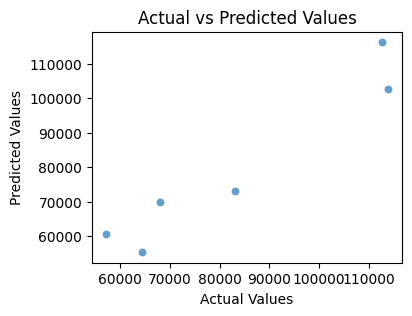

ERROR:root:LiteLLM call failed: litellm.AuthenticationError: AuthenticationError: OpenAIException - The api_key client option must be set either by passing api_key to the client or by setting the OPENAI_API_KEY environment variable


Retraining the model with adjusted parameters...


LiteLLM.Info: If you need to debug this error, use `litellm.set_verbose=True'.

 Error during LLM call: litellm.AuthenticationError: AuthenticationError: OpenAIException - The api_key client option must be set either by passing api_key to the client or by setting the OPENAI_API_KEY environment variable


AuthenticationError: litellm.AuthenticationError: AuthenticationError: OpenAIException - The api_key client option must be set either by passing api_key to the client or by setting the OPENAI_API_KEY environment variable

In [ ]:
from crewai import Agent, Task, Crew
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from langchain_groq import ChatGroq

# Initialize LLM
groq_api_key = "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"
llm_name = "llama3-70b-8192"
llm = ChatGroq(temperature=0, groq_api_key=groq_api_key, model_name=llm_name)

# Preprocessing agent
def preprocess_data(df):
    df = df.dropna()  # Handle missing values
    X = df.iloc[:, :-1]  # Features
    y = df.iloc[:, -1]  # Target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

preprocessor_agent = Agent(
    role="Data Preprocessor",
    goal="Prepare data for ML training by handling missing values and splitting dataset.",
    backstory="An experienced data scientist specialized in data cleaning and preprocessing."
)

# Training agent
def train_model(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

trainer_agent = Agent(
    role="ML Trainer",
    goal="Train an ML model on the provided dataset.",
    backstory="A skilled ML engineer with expertise in model training and optimization."
)

# Evaluation agent
def evaluate_model(model, X_test, y_test, train_error):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    # Visualization
    plt.figure(figsize=(4, 3))
    sns.scatterplot(x=y_test, y=predictions, alpha=0.7)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Actual vs Predicted Values")
    plt.show()

    retrain = mse > train_error * 1.2  # Retrain if test error is significantly higher
    return mse, mae, r2, retrain

evaluator_agent = Agent(
    role="Model Evaluator",
    goal="Evaluate ML model performance and decide if retraining is needed.",
    backstory="A seasoned ML researcher with expertise in model evaluation."
)

# Retraining agent
def retrain_model(retrain_flag):
    if retrain_flag:
        print("Retraining the model with adjusted parameters...")
        return False  # Placeholder for retraining logic
    return retrain_flag

retrainer_agent = Agent(
    role="Model Retrainer",
    goal="Decide when to retrain the model for better accuracy.",
    backstory="A data scientist specialized in hyperparameter tuning and model optimization."
)

# Tasks
data_preprocessing_task = Task(
    description="Clean the dataset, remove missing values, and split into train-test sets.",
    agent=preprocessor_agent,
    expected_output="Preprocessed data with training and test sets."
)

model_training_task = Task(
    description="Train a Linear Regression model on the preprocessed data.",
    agent=trainer_agent,
    expected_output="A trained Linear Regression model."
)

model_evaluation_task = Task(
    description="Evaluate the trained model and determine if retraining is required.",
    agent=evaluator_agent,
    expected_output="Evaluation metrics (MSE, MAE, R2 score) and retraining decision."
)

model_retraining_task = Task(
    description="Retrain the model if necessary to improve accuracy.",
    agent=retrainer_agent,
    expected_output="Retrained model or confirmation that no retraining was needed."
)

# Crew setup with the Groq LLM passed explicitly
ml_crew = Crew(
    agents=[preprocessor_agent, trainer_agent, evaluator_agent, retrainer_agent],
    tasks=[data_preprocessing_task, model_training_task, model_evaluation_task, model_retraining_task],
    llm=llm
)

# Example dataset usage
df = pd.read_csv("Salary_dataset.csv")
X_train, X_test, y_train, y_test = preprocess_data(df)
model = train_model(X_train, y_train)
train_error = mean_squared_error(y_train, model.predict(X_train))
mse, mae, r2, retrain_flag = evaluate_model(model, X_test, y_test, train_error)
retrain_model(retrain_flag)

# Execute the crew workflow
ml_crew.kickoff()


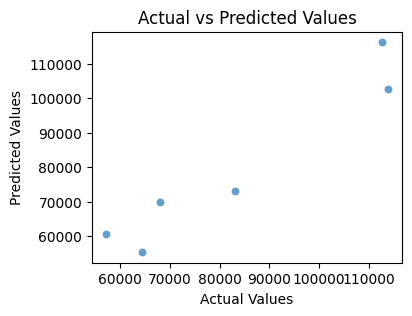

ERROR:root:LiteLLM call failed: litellm.AuthenticationError: AuthenticationError: OpenAIException - The api_key client option must be set either by passing api_key to the client or by setting the OPENAI_API_KEY environment variable


Retraining the model with adjusted parameters...


LiteLLM.Info: If you need to debug this error, use `litellm.set_verbose=True'.

 Error during LLM call: litellm.AuthenticationError: AuthenticationError: OpenAIException - The api_key client option must be set either by passing api_key to the client or by setting the OPENAI_API_KEY environment variable


AuthenticationError: litellm.AuthenticationError: AuthenticationError: OpenAIException - The api_key client option must be set either by passing api_key to the client or by setting the OPENAI_API_KEY environment variable

In [ ]:
from crewai import Agent, Task, Crew
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Define a dummy LLM that does nothing
class DummyLLM:
    def __call__(self, prompt, **kwargs):
        # Simply return an empty string or some default output
        return ""
    def complete(self, prompt, **kwargs):
        return ""

dummy_llm = DummyLLM()

# Preprocessing agent
def preprocess_data(df):
    df = df.dropna()  # Handle missing values
    X = df.iloc[:, :-1]  # Features
    y = df.iloc[:, -1]   # Target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

preprocessor_agent = Agent(
    role="Data Preprocessor",
    goal="Prepare data for ML training by handling missing values and splitting dataset.",
    backstory="An experienced data scientist specialized in data cleaning and preprocessing."
)

# Training agent
def train_model(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

trainer_agent = Agent(
    role="ML Trainer",
    goal="Train an ML model on the provided dataset.",
    backstory="A skilled ML engineer with expertise in model training and optimization."
)

# Evaluation agent
def evaluate_model(model, X_test, y_test, train_error):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    # Visualization
    plt.figure(figsize=(4, 3))
    sns.scatterplot(x=y_test, y=predictions, alpha=0.7)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Actual vs Predicted Values")
    plt.show()

    retrain = mse > train_error * 1.2  # Retrain if test error is significantly higher
    return mse, mae, r2, retrain

evaluator_agent = Agent(
    role="Model Evaluator",
    goal="Evaluate ML model performance and decide if retraining is needed.",
    backstory="A seasoned ML researcher with expertise in model evaluation."
)

# Retraining agent
def retrain_model(retrain_flag):
    if retrain_flag:
        print("Retraining the model with adjusted parameters...")
        return False  # Placeholder for retraining logic
    return retrain_flag

retrainer_agent = Agent(
    role="Model Retrainer",
    goal="Decide when to retrain the model for better accuracy.",
    backstory="A data scientist specialized in hyperparameter tuning and model optimization."
)

# Tasks
data_preprocessing_task = Task(
    description="Clean the dataset, remove missing values, and split into train-test sets.",
    agent=preprocessor_agent,
    expected_output="Preprocessed data with training and test sets."
)

model_training_task = Task(
    description="Train a Linear Regression model on the preprocessed data.",
    agent=trainer_agent,
    expected_output="A trained Linear Regression model."
)

model_evaluation_task = Task(
    description="Evaluate the trained model and determine if retraining is required.",
    agent=evaluator_agent,
    expected_output="Evaluation metrics (MSE, MAE, R2 score) and retraining decision."
)

model_retraining_task = Task(
    description="Retrain the model if necessary to improve accuracy.",
    agent=retrainer_agent,
    expected_output="Retrained model or confirmation that no retraining was needed."
)

# Crew setup with the dummy LLM to avoid external LLM calls
ml_crew = Crew(
    agents=[preprocessor_agent, trainer_agent, evaluator_agent, retrainer_agent],
    tasks=[data_preprocessing_task, model_training_task, model_evaluation_task, model_retraining_task],
    llm=dummy_llm  # Pass the dummy LLM here
)

# Example dataset usage
df = pd.read_csv("Salary_dataset.csv")
X_train, X_test, y_train, y_test = preprocess_data(df)
model = train_model(X_train, y_train)
train_error = mean_squared_error(y_train, model.predict(X_train))
mse, mae, r2, retrain_flag = evaluate_model(model, X_test, y_test, train_error)
retrain_model(retrain_flag)

# Execute the crew workflow
ml_crew.kickoff()
